# 서울에 있는 종합병원의 분포 알아보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 데이터가져오기

In [3]:
df = pd.read_csv('C:/Users/82109/data_setting/data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv',encoding='cp949')

In [4]:
df.shape

(91335, 39)

#shift + tap 키를 누르시면 docstring을 볼 수 있다.
#head로 데이터 미리보기
df.head(1)

In [5]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3.020000e+24,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4.130000e+24,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2.640000e+24,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2.0,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.170000e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [7]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [9]:


#결측치를 처리해보자
null_count = df.isnull().sum()

In [10]:
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<AxesSubplot:>

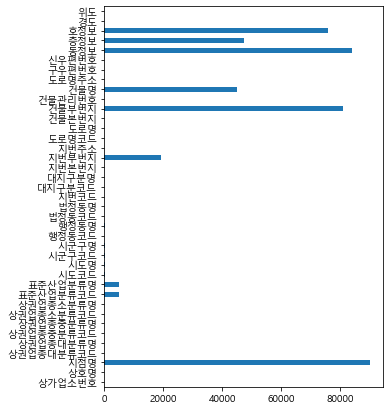

In [11]:
null_count.plot.barh(figsize=(5,7)) 

In [12]:
#reset_index를 하면 데이터프레임 형태로 변경이 됨
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [13]:



df_null_count.columns = ['컬럼명','결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [14]:
df_null_count_top = df_null_count.sort_values(by='결측치수',ascending =False).head(10)

In [15]:
df['지점명']

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [16]:
drop_columns = df_null_count_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [17]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [18]:
#df = df.drop(drop_columns, axis=1)
df.shape

(91335, 39)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [20]:
#평균값
df['위도'].mean()

36.62471119236107

In [21]:
df['위도'].median()

37.23465232

In [22]:
df['위도'].max()

38.49965857

In [23]:
df['위도'].min()

33.21928967

In [24]:
df['위도'].count()

91335

In [25]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [26]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [27]:
df.describe(include='object')

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물명,도로명주소,동정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,90956,90956,90956,91280,91335,91335,91335,46453,91335,7406
unique,56908,858,1,1,5,5,34,34,15,15,17,228,2791,2822,2,53118,16610,17946,54031,556
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,21374,3165,1856,874,91213,198,326,131,198,1571


In [28]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [29]:
df['상권업종대분류명'].nunique()

1

In [30]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [31]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [32]:
df['상권업종소분류명'].nunique()

34

In [33]:
df['시도명'].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [34]:
city = df['시도명'].value_counts()

In [35]:
df['시도명'].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

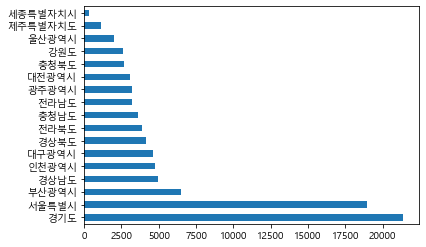

In [36]:
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

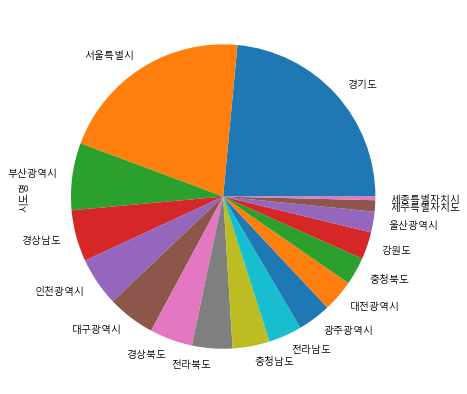

In [37]:
city.plot.pie(figsize=[7,7])

<AxesSubplot:xlabel='count', ylabel='시도명'>

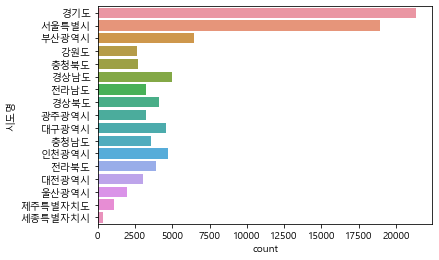

In [38]:
sns.countplot(data= df, y='시도명')

In [39]:
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [40]:
c= df['상권업종중분류명'].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [41]:
df['상권업종중분류명'].value_counts(normalize=True)

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

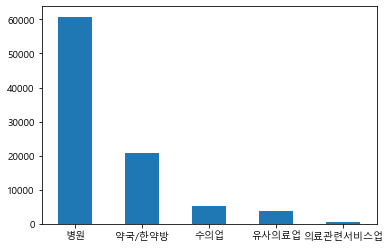

In [42]:
c.plot.bar(rot=0)

In [43]:
df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy()
df_medical.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.150000e+24,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4.210000e+24,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2.0,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,4.310000e+24,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1.0,NaN,127.499206,36.625355
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.890000e+24,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
13,21217689,제중당한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4.680000e+24,NaN,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,NaN,NaN,NaN,126.630348,34.834080


In [44]:
df.loc[df['상권업종대분류명'] =='의료','상권업종대분류명'] #loc행과열이 존재할때, 인덱싱하기

0        의료
1        의료
2        의료
3        의료
4        의료
         ..
91330    의료
91331    의료
91332    의료
91333    의료
91334    의료
Name: 상권업종대분류명, Length: 91335, dtype: object

In [45]:
df_medi = df[df['상권업종중분류명']=='유사의료업']
df_medi.shape

(3774, 39)

In [46]:
df['상호명'].value_counts().head()

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
Name: 상호명, dtype: int64

In [47]:
df_medi['상호명'].value_counts().head()

리원         32
고려수지침      22
대한적십자사     17
헌혈의집       12
고려수지침학회    10
Name: 상호명, dtype: int64

In [48]:
df_seoul_drug=df[(df['상권업종소분류명']=='약국') & (df['시도명'] =='서울특별시')]
df_seoul_drug

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.170000e+24,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1.0,NaN,127.028023,37.498656
51,20855710,진흥약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.170000e+24,둔촌푸르지오아파트,서울특별시 강동구 명일로 172,134767.0,5360.0,NaN,NaN,NaN,127.145055,37.534135
130,21589838,신세계약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.130000e+24,금강리빙스텔,서울특별시 중랑구 신내로 211,131130.0,2024.0,NaN,1.0,NaN,127.092597,37.616424
136,22388303,메디팜한솔약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.120000e+24,한진노변상가,서울특별시 성동구 행당로 82,133777.0,4717.0,NaN,1.0,NaN,127.027513,37.556238
141,22412563,명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.120000e+24,NaN,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,NaN,1.0,NaN,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.130000e+24,종암선경아파트,서울특별시 성북구 종암로5길 26,136769.0,2811.0,NaN,1.0,116.0,127.033907,37.594792
91275,16195709,더블유스토어,세계로,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.150000e+24,신구로자이나인스에비뉴,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,1,1.0,NaN,126.884285,37.499936
91288,16131839,종각팜약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.110000e+24,대한기독교서회,서울특별시 종로구 종로 68,110122.0,3189.0,NaN,1.0,NaN,126.984930,37.569882
91301,16188650,온누리약국,우리네,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1.150000e+24,NaN,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,NaN,NaN,NaN,126.888070,37.484897


In [49]:
c=df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [50]:
#서울에 있는 종합병원 분포를 확인할거야
df_seoul_hospital = df[(df['상권업종소분류명']=='종합병원')&(df['시도명']=='서울특별시')].copy()

In [51]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

## 서울 종합병원의 데이터 가공!!
*종합병원 아닌 데이터들은 지워야지!
*데이터를 가공하고 보니 남은 데이터가 몇개 없네...

In [52]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원')
                      ,'상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [84]:
df_seoul_hospital['상호명'].str.contains('꽃배달').value_counts()

False    39
True      2
Name: 상호명, dtype: int64

In [ ]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의료기')]

In [85]:
#종합병원과 무관한 데이터 전처리시켜야대!!!
drop_row = df_seoul_hospital[
    df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
len(drop_row)

8

In [86]:
drop_row2 =df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2
len(drop_row2)

0

In [87]:
 drop_row = drop_row + drop_row2
drop_row
len(drop_row)

8

In [88]:
df_seoul_hospital=df_seoul_hospital.drop(drop_row,axis=0)

In [ ]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x='시군구명',
             order = df_seoul_hospital['시군구명'].value_counts().index)

In [ ]:
df_seoul_hospital['상호명'].unique()

In [93]:
drop_row3 = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('재단|연구소|학원|우울증|별관|외래|메디피아|마취과|클리닉|상담소|의원|여객|신장실')].index
drop_row3 =drop_row3.tolist()
drop_row3

[10937]

In [91]:
df_seoul_hospital = df_seoul_hospital.drop(drop_row3, axis = 0)

In [94]:
df_seoul_hospital['상호명'].unique() 

array(['SNUH', '한양', '서울보훈병원', '서울대학교병원', '제일병원', '서울아산병원신관', '고려대학교구로병원',
       '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원', '한국전력공사부속한일병원',
       '신촌연세병원', '영동세브란스병원', '서울시립보라매병원', '평화드림서울성모병원의료', '홍익병원', '우신향병원',
       '동부제일병원', '한국건강관리협회서울특', '성베드로병원', '인제대학교서울백병원', '사랑의병원', '씨엠충무병원',
       '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원', '서울성모병원응급의료센터',
       '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x='시군구명',
             order = df_seoul_hospital['시군구명'].value_counts().index)

## 특정지역만 보기

In [ ]:
#서울에 있는 데이터의 위도와 경도를 봅니다.
df_seoul = df[df['시도명']== '서울특별시'].copy()
df_seoul.shape

In [ ]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의 
# 시군구명을 시각화합니다.
df_seoul['시군구명'].value_counts().plot.barh(10,4)

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data = df_seoul, y = '시군구명')

In [ ]:
# pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[['경도','위도','시군구명']].plot.scatter(x='경도', y='위도', grid =True)

In [ ]:
# seaborn의 scatterplot을 통해 구별 경도와 위도를 표시해봅니다.
plt.figure(figsize = (10,10))
sns.scatterplot(data = df_seoul, x= '경도', y='위도',hue ='상권업종중분류명')

In [ ]:
sns.scatterplot(data = df, x= '경도', y='위도',hue ='시도명')

## folium으로 지도활용하기

In [65]:
import folium

In [66]:
folium.Map()

In [67]:
df_seoul_hospital['위도'].mean()

37.54244715615384

In [68]:
df_seoul_hospital['경도'].mean()

127.00850537362635

In [71]:
df_seoul_hospital.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1.120000e+24,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048


In [95]:
map = folium.Map(location= [df_seoul_hospital['위도'].mean(),df_seoul_hospital['경도'].mean()],
          zoom_start=12)
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n,'상호명']
    address = df_seoul_hospital.loc[n,'도로명주소']
    popup = f"{name}-{address}"
    location = df_seoul_hospital.loc[n,'위도'],df_seoul_hospital.loc[n,'경도']
    folium.Marker(location=location, popup = popup).add_to(map)

map
    
